# <화재발생빈도와 전력사용량 상관관계>

# 2019년 서울시 화재발생빈도(월별)

In [2]:
# 2019년 서울시 화재발생빈도 파일을 가져옴
from matplotlib import pyplot
import matplotlib
import pandas as pd

file = pd.read_csv('2019.txt', delimiter = '\t')

file

,기간,지역,월별,발생,발생.1,발생.2,발생.3,소실,소실.1,소실.2,피해액,피해액.1,피해액.2,재산피해경감액,인명피해,인명피해.1,인명피해.2,이재민수,구조인원
0,기간,지역,월별,합계,실화,방화,기타,동수,이재가구수,면적,합계,부동산,동산,재산피해경감액,합계,사망,부상,이재민수,구조인원
1,2019,합계,계,"5,881","5,251",136,494,773,171,"32,220.91","92,409,010","12,331,390","80,077,620","384,176,624",398,37,361,318,921
2,2019,합계,1월,600,529,19,52,98,40,"2,571.53","1,766,805","580,112","1,186,693","23,900,245",42,4,38,64,143
3,2019,합계,2월,414,360,14,40,62,16,"1,485.3","1,545,133","403,239","1,141,894","32,910,244",26,4,22,19,61
4,2019,합계,3월,501,448,11,42,85,-,"6,851.01","4,829,698","1,613,428","3,216,270","24,434,210",28,2,26,5,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2019,강동구,8월,29,27,-,2,3,-,156,"78,627","15,910","62,717","582,465",-,-,-,-,3
335,2019,강동구,9월,21,19,-,2,1,-,20,"18,302","1,012","17,290","17,637",1,-,1,-,1
336,2019,강동구,10월,20,18,-,2,1,-,1,"65,494","1,353","64,141","1,233,925",3,-,3,-,-
337,2019,강동구,11월,17,15,1,1,-,-,2,"2,932",885,"2,047","176,811",-,-,-,-,-


In [3]:
# unique를 사용해 지역이름들을 뽑아냄 
from matplotlib import pyplot
import matplotlib
import pandas as pd

file = pd.read_csv('2019.txt', delimiter = '\t')
region=file["지역"].unique().tolist()
region.pop(0)
region.pop(0)
region

['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [4]:
# 파일접근 방법 at 을 쓰기 위해서 index를 지역명으로 바꿈
from matplotlib import pyplot
import matplotlib
import pandas as pd

file = pd.read_csv('2019.txt', delimiter = '\t')
region=file["지역"].unique().tolist()
region.pop(0)
region.pop(0)

file = file.set_index(file.columns[1])
file

,기간,월별,발생,발생.1,발생.2,발생.3,소실,소실.1,소실.2,피해액,피해액.1,피해액.2,재산피해경감액,인명피해,인명피해.1,인명피해.2,이재민수,구조인원
지역,,,,,,,,,,,,,,,,,,
지역,기간,월별,합계,실화,방화,기타,동수,이재가구수,면적,합계,부동산,동산,재산피해경감액,합계,사망,부상,이재민수,구조인원
합계,2019,계,"5,881","5,251",136,494,773,171,"32,220.91","92,409,010","12,331,390","80,077,620","384,176,624",398,37,361,318,921
합계,2019,1월,600,529,19,52,98,40,"2,571.53","1,766,805","580,112","1,186,693","23,900,245",42,4,38,64,143
합계,2019,2월,414,360,14,40,62,16,"1,485.3","1,545,133","403,239","1,141,894","32,910,244",26,4,22,19,61
합계,2019,3월,501,448,11,42,85,-,"6,851.01","4,829,698","1,613,428","3,216,270","24,434,210",28,2,26,5,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
강동구,2019,8월,29,27,-,2,3,-,156,"78,627","15,910","62,717","582,465",-,-,-,-,3
강동구,2019,9월,21,19,-,2,1,-,20,"18,302","1,012","17,290","17,637",1,-,1,-,1
강동구,2019,10월,20,18,-,2,1,-,1,"65,494","1,353","64,141","1,233,925",3,-,3,-,-


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

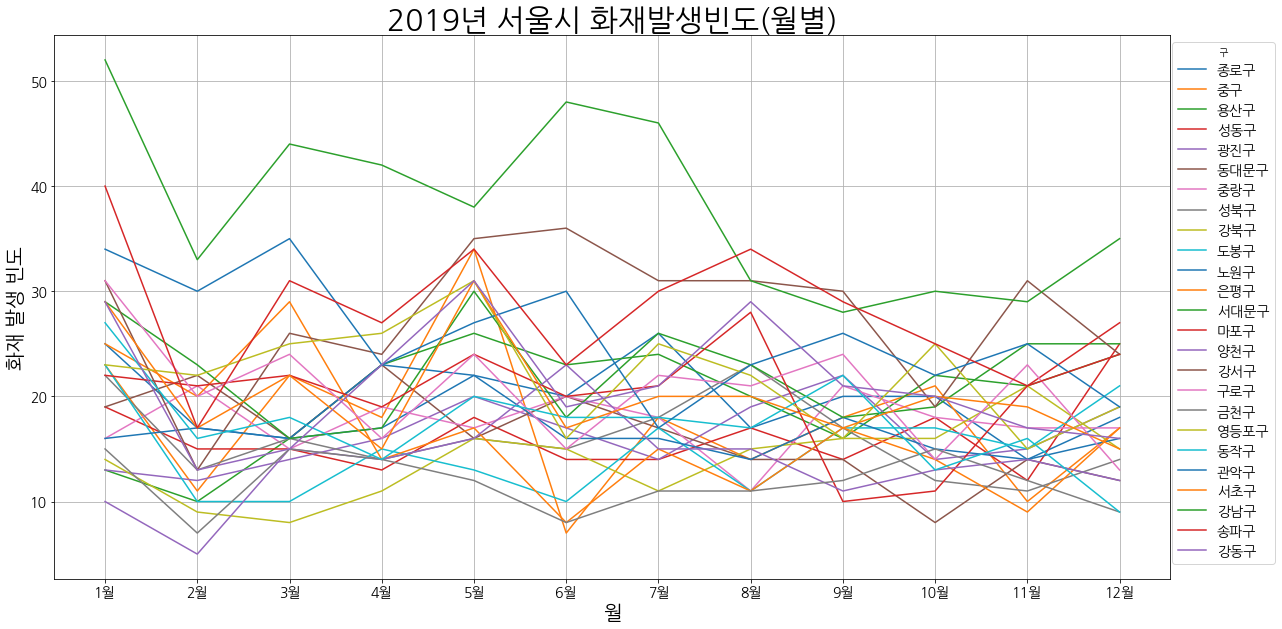

In [7]:
# 각 지역의 월별 화재발생빈도 그래프 만듦
from matplotlib import pyplot
import matplotlib
import pandas as pd

label=["1월","2월","3월","4월","5월","6월",
   "7월","8월","9월","10월","11월","12월"]

file = pd.read_csv('2019.txt', delimiter = '\t')
region=file["지역"].unique().tolist()
region.pop(0)
region.pop(0)

file = file.set_index(file.columns[1])
pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.figure()
pyplot.grid()
pyplot.title('2019년 서울시 화재발생빈도(월별)', fontsize=30)
pyplot.xlabel("월", fontsize=20)
pyplot.ylabel("화재 발생 빈도", fontsize=20)
pyplot.rcParams["font.family"] = "NanumGothic"

for i in range(0,len(region)):   
    file_sample=file.at[region[i],"발생"]
    file_sample = file_sample.tolist()
    file_sample = list(map(int, file_sample))
    file_sample.pop(0)
    pyplot.plot(file_sample, label=region[i])
    pyplot.legend(title="구", loc=1,bbox_to_anchor=(1.1,1 ),prop={'size': 14})

x=list(range(0,len(label)))
pyplot.xticks(x,label)
pyplot.xticks(fontsize = 14)
pyplot.yticks(fontsize = 14)

# 2019년 서울시 화재발생빈도(구별)

(array([100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 9 Text yticklabel objects>)

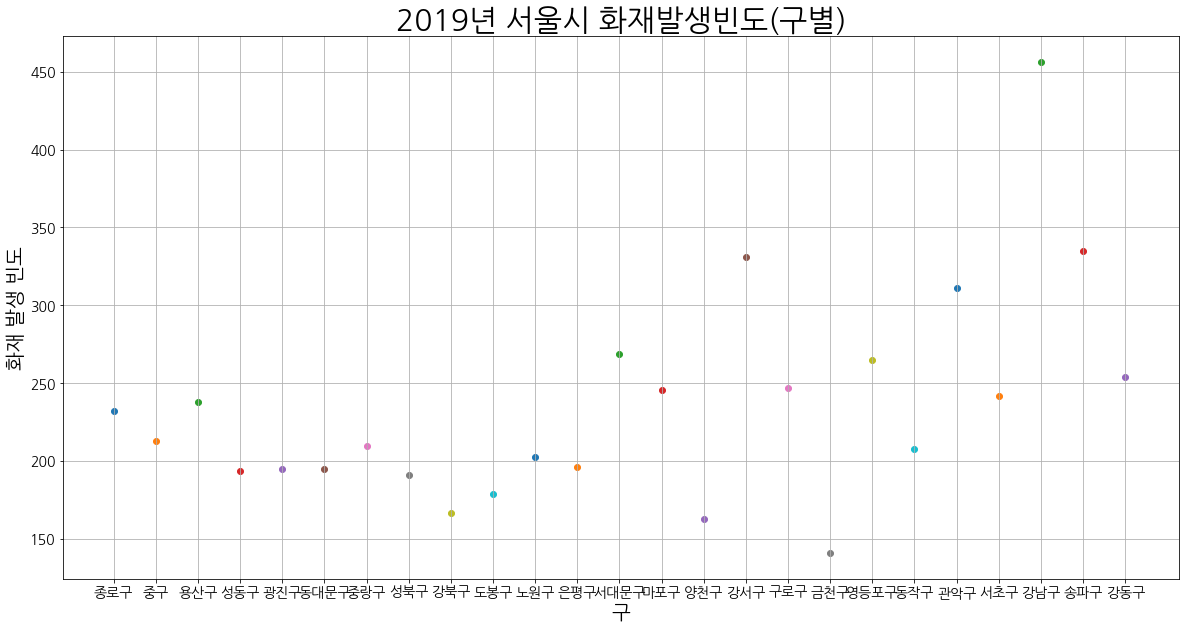

In [39]:
# 위 그래프가 2월에 빈도가 줄어들고 5월에 증가하는 거 외에 특별한 점이 없어서 전력사용량과 비교하기로함
# 그래서 구별 빈도를 scatter그래프로 나타냄
from matplotlib import pyplot
import matplotlib
import pandas as pd

total=[]
file = pd.read_csv('2019.txt', delimiter = '\t')
region=file["지역"].unique().tolist()
region.pop(0)
region.pop(0)
file = file.set_index(file.columns[1])
pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.figure()
pyplot.grid()
pyplot.title('2019년 서울시 화재발생빈도(구별)', fontsize=30)
pyplot.xlabel("구", fontsize=20)
pyplot.ylabel("화재 발생 빈도", fontsize=20)
pyplot.rcParams["font.family"] = "NanumGothic"

for i in range(0,len(region)):  
    file_sample=file.at[region[i],"발생"]
    file_sample = file_sample.tolist()    
    file_sample = list(map(int, file_sample))
    file_sample.pop(0)
    total_count=0
    
    for j in range(0,12):
        total_count+=file_sample[j]  
    
    pyplot.scatter(region[i], total_count, label=region[i])

x=list(range(0,len(region)))
pyplot.xticks(x,region)
pyplot.xticks(fontsize = 14)
pyplot.yticks(fontsize = 14)

# 2019년 서울시 구별 전력 사용량

(array([ 500000., 1000000., 1500000., 2000000., 2500000., 3000000.,
        3500000., 4000000., 4500000., 5000000.]),
 <a list of 10 Text yticklabel objects>)

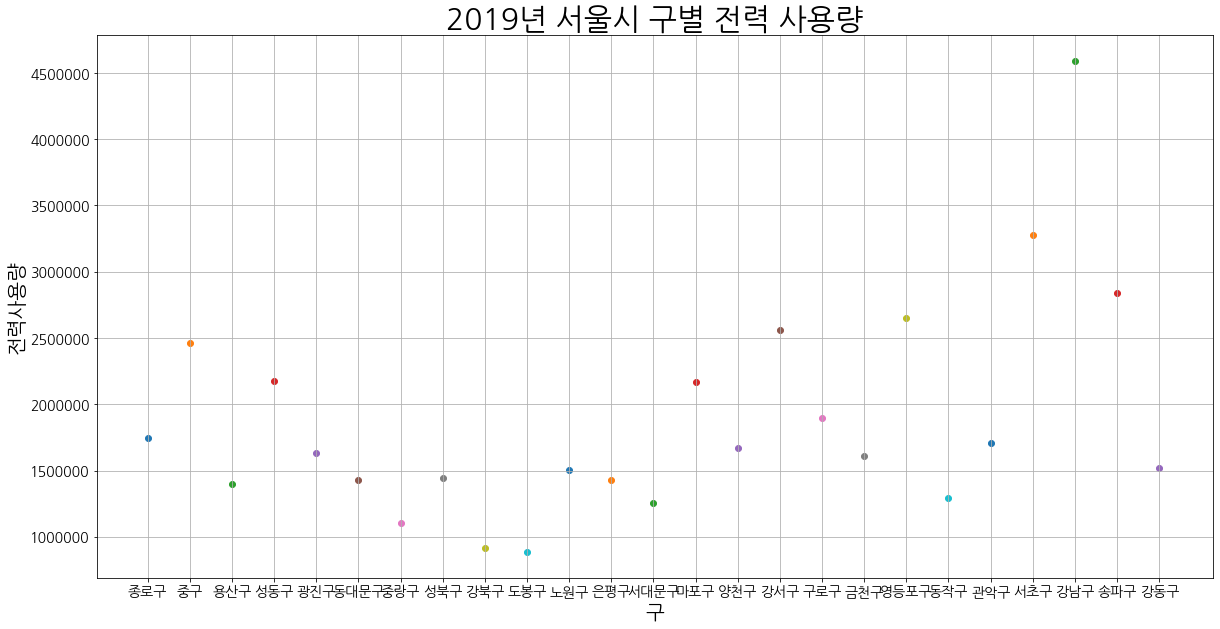

In [40]:
# 2019년 서울시 구별 전력 사용량파일을 받아와서 그래프로 나타냄
from matplotlib import pyplot
import matplotlib
import pandas as pd


file = pd.read_csv('2019_E.txt', delimiter = '\t')
region=file["자치구"].unique().tolist()
region.pop(0)
region.pop(0)
file = file.set_index(file.columns[1])
pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.figure()
pyplot.grid()
pyplot.title('2019년 서울시 구별 전력 사용량', fontsize=30)
pyplot.xlabel("구", fontsize=20)
pyplot.ylabel("전력사용량", fontsize=20)
pyplot.rcParams["font.family"] = "NanumGothic"

for i in range(0,len(region)):    
    file_sample=file.at[region[i],"합계"]
    file_sample= int(file_sample.replace(",",""))
    pyplot.scatter(region[i],file_sample, label=region[i])

x=list(range(0,len(region)))
pyplot.xticks(x,region)
pyplot.xticks(fontsize = 14)
pyplot.yticks(fontsize = 14)

# 2019년 서울시 화재와 전력사용량 상관관계(구별)

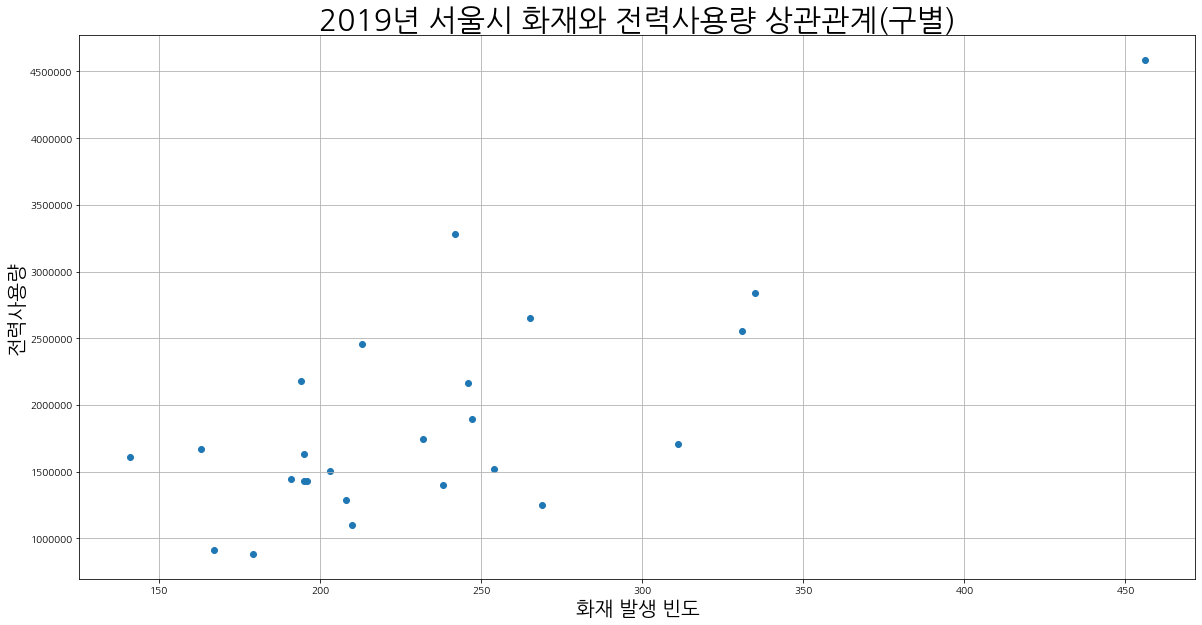

In [10]:
# 2019년 화재발생빈도와 전력사용량 상관관계를 scatter로 나타냄.
# 약간 상관관계가 있어보여 2013년부터 2019년까지 다 넣어보기로함
from matplotlib import pyplot
import matplotlib
import pandas as pd

region_total=[]
elec_total=[]

file1 = pd.read_csv('2019.txt', delimiter = '\t')
region=file1["지역"].unique().tolist()
region.pop(0)
region.pop(0)
file1 = file1.set_index(file1.columns[1])

file2 = pd.read_csv('2019_E.txt', delimiter = '\t')
region=file2["자치구"].unique().tolist()
region.pop(0)
region.pop(0)
file2 = file2.set_index(file2.columns[1])


pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.figure()
pyplot.grid()
pyplot.title('2019년 서울시 화재와 전력사용량 상관관계(구별)', fontsize=30)
pyplot.xlabel("화재 발생 빈도", fontsize=20)
pyplot.ylabel("전력사용량", fontsize=20)
pyplot.rcParams["font.family"] = "NanumGothic"

for i in range(0,len(region)):
    file_sample=file1.at[region[i],"발생"]
    file_sample = file_sample.tolist()    
    file_sample = list(map(int, file_sample))
    file_sample.pop(0)
    total_count=0
    
    for j in range(0,12):
        total_count+=file_sample[j]
    
    region_total.append(total_count)
    file_sample=file2.at[region[i],"합계"]
    elec_total.append(int(file_sample.replace(",","")))
    
pyplot.scatter(region_total,elec_total)

# 2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(합계)

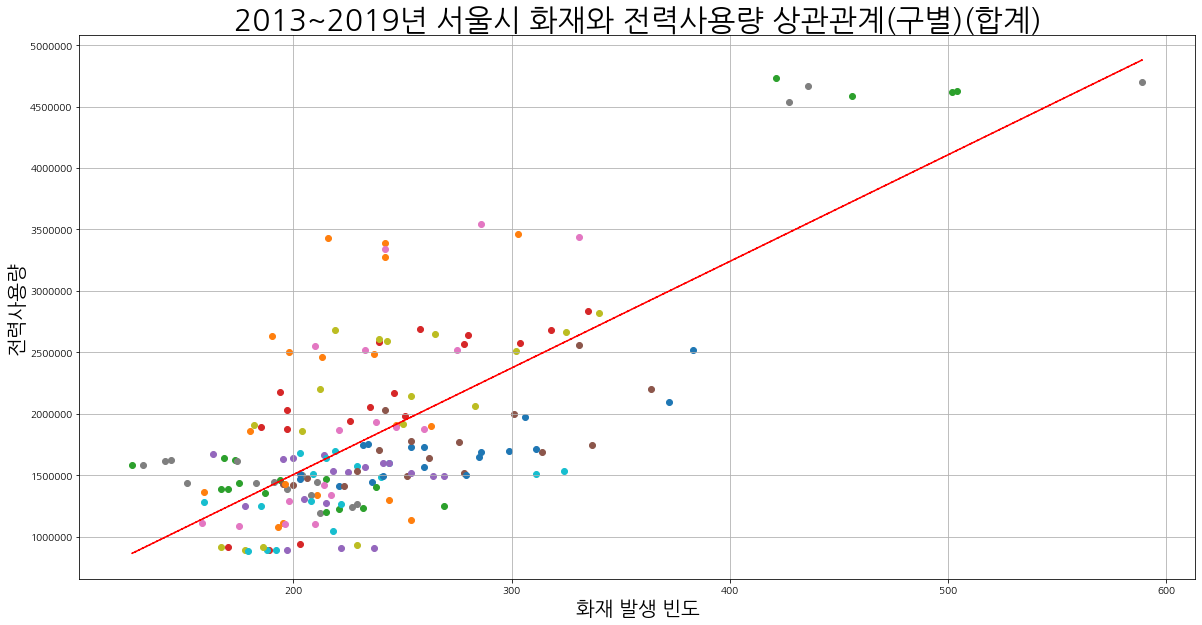

In [42]:
#2013년부터 2019년까지 화재발생빈도와 전력사용량 상관관계를 그리고 추세선을 그려보니 상관관계가 있어보임
from matplotlib import pyplot
import matplotlib
import pandas as pd
import numpy as np


pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.figure()
pyplot.grid()
pyplot.title('2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(합계)', fontsize=30)
pyplot.xlabel("화재 발생 빈도", fontsize=20)
pyplot.ylabel("전력사용량", fontsize=20)
pyplot.rcParams["font.family"] = "NanumGothic"

A1=[]
A2=[]

for k in range(3,10):
    year1="201"+str(k)+".txt"
    year2="201"+str(k)+"_E.txt"
    file1 = pd.read_csv(year1, delimiter = '\t')
    region=file1["지역"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file1 = file1.set_index(file1.columns[1])
    file2 = pd.read_csv(year2, delimiter = '\t')
    region=file2["자치구"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file2 = file2.set_index(file2.columns[1])
     
    for i in range(0,len(region)):
        region_total=[]
        elec_total=[]      
        file_sample=file1.at[region[i],"발생"]
        file_sample = file_sample.tolist()    
        file_sample = list(map(int, file_sample))
        file_sample.pop(0)
        total_count=0
        
        for j in range(0,12):
            total_count+=file_sample[j]
            
        region_total.append(total_count)
        file_sample=file2.at[region[i],"합계"]
        elec_total.append(int(file_sample.replace(",","")))
        pyplot.scatter(region_total,elec_total)     
        A1.append(total_count)
        A2.append(int(file_sample.replace(",","")))

z = np.polyfit(A1, A2, 1)
p = np.poly1d(z)
pyplot.plot(A1,p(A1),"r--")  

# 2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(가정용전력)

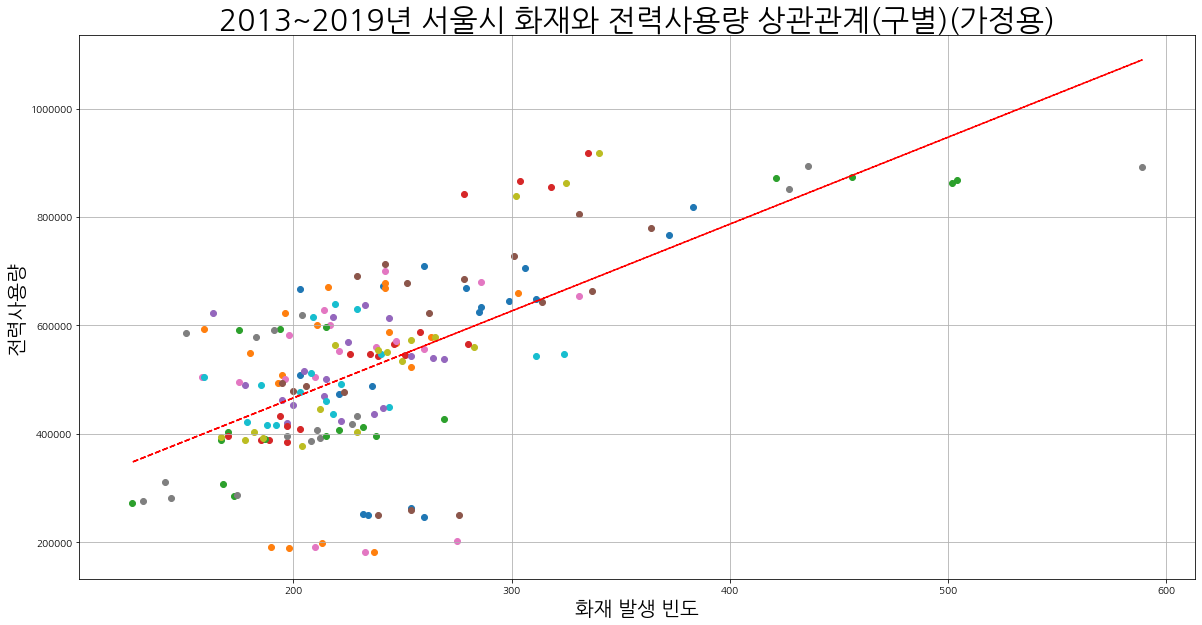

In [43]:
# 업종별 전력사용량이 있어 이들의 전력사용량과 화재발생빈도의 상관관계를 알아보기로함.
from matplotlib import pyplot
import matplotlib
import pandas as pd
import numpy as np


pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.figure()
pyplot.grid()
pyplot.title('2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(가정용)', fontsize=30)
pyplot.xlabel("화재 발생 빈도", fontsize=20)
pyplot.ylabel("전력사용량", fontsize=20)
pyplot.rcParams["font.family"] = "NanumGothic"

A1=[]
A2=[]

for k in range(3,10):
    year1="201"+str(k)+".txt"
    year2="201"+str(k)+"_E.txt"
    
    file1 = pd.read_csv(year1, delimiter = '\t')
    region=file1["지역"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file1 = file1.set_index(file1.columns[1])
    
    file2 = pd.read_csv(year2, delimiter = '\t')
    region=file2["자치구"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file2 = file2.set_index(file2.columns[1])
     
    for i in range(0,len(region)):
        region_total=[]
        elec_total=[]  
        file_sample=file1.at[region[i],"발생"]
        file_sample = file_sample.tolist()    
        file_sample = list(map(int, file_sample))
        file_sample.pop(0)
        total_count=0
        
        for j in range(0,12):
            total_count+=file_sample[j]
            
        region_total.append(total_count)
        file_sample=file2.at[region[i],"가정용"] 
        elec_total.append(int(file_sample.replace(",","")))
        pyplot.scatter(region_total,elec_total) 
        A1.append(total_count)
        A2.append(int(file_sample.replace(",","")))

z = np.polyfit(A1, A2, 1)
p = np.poly1d(z)
pyplot.plot(A1,p(A1),"r--")  

# 2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(공공용전력)

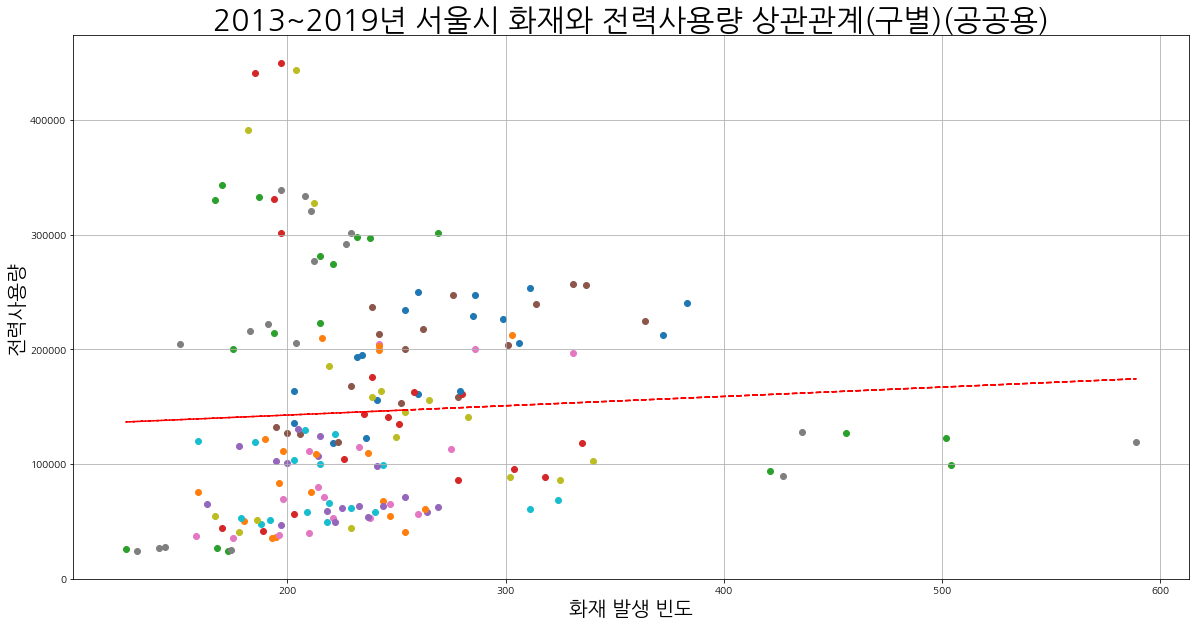

In [44]:
from matplotlib import pyplot
import matplotlib
import pandas as pd
import numpy as np


pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.figure()
pyplot.grid()
pyplot.title('2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(공공용)', fontsize=30)
pyplot.xlabel("화재 발생 빈도", fontsize=20)
pyplot.ylabel("전력사용량", fontsize=20)
pyplot.rcParams["font.family"] = "NanumGothic"

A1=[]
A2=[]

for k in range(3,10):
    year1="201"+str(k)+".txt"
    year2="201"+str(k)+"_E.txt"
    
    file1 = pd.read_csv(year1, delimiter = '\t')
    region=file1["지역"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file1 = file1.set_index(file1.columns[1])
    
    file2 = pd.read_csv(year2, delimiter = '\t')
    region=file2["자치구"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file2 = file2.set_index(file2.columns[1])

    for i in range(0,len(region)):
        region_total=[]
        elec_total=[]   
        file_sample=file1.at[region[i],"발생"]
        file_sample = file_sample.tolist()    
        file_sample = list(map(int, file_sample))
        file_sample.pop(0)
        total_count=0
        
        for j in range(0,12):
            total_count+=file_sample[j]
            
        region_total.append(total_count)
        file_sample=file2.at[region[i],"공공용"] 
        elec_total.append(int(file_sample.replace(",","")))
        pyplot.scatter(region_total,elec_total) 
        A1.append(total_count)
        A2.append(int(file_sample.replace(",","")))

z = np.polyfit(A1, A2, 1)
p = np.poly1d(z)
pyplot.plot(A1,p(A1),"r--")  

# 2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(서비스업용전력)

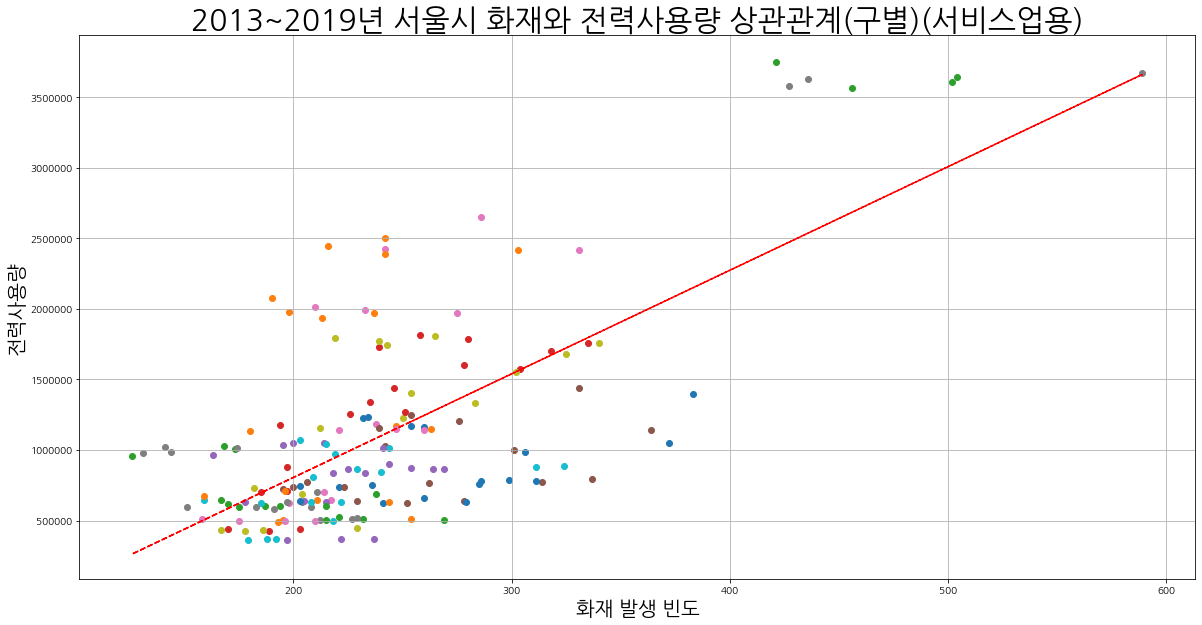

In [45]:
from matplotlib import pyplot
import matplotlib
import pandas as pd
import numpy as np


pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.figure()
pyplot.grid()
pyplot.title('2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(서비스업용)', fontsize=30)
pyplot.xlabel("화재 발생 빈도", fontsize=20)
pyplot.ylabel("전력사용량", fontsize=20)
pyplot.rcParams["font.family"] = "NanumGothic"

A1=[]
A2=[]

for k in range(3,10):
    year1="201"+str(k)+".txt"
    year2="201"+str(k)+"_E.txt"
    
    file1 = pd.read_csv(year1, delimiter = '\t')
    region=file1["지역"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file1 = file1.set_index(file1.columns[1])

    file2 = pd.read_csv(year2, delimiter = '\t')
    region=file2["자치구"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file2 = file2.set_index(file2.columns[1])

    for i in range(0,len(region)):
        region_total=[]
        elec_total=[]
        file_sample=file1.at[region[i],"발생"]
        file_sample = file_sample.tolist()    
        file_sample = list(map(int, file_sample))
        file_sample.pop(0)
        total_count=0
        
        for j in range(0,12):
            total_count+=file_sample[j]
            
        region_total.append(total_count)
        file_sample=file2.at[region[i],"서비스업"] 
        elec_total.append(int(file_sample.replace(",","")))
        pyplot.scatter(region_total,elec_total)    
        A1.append(total_count)
        A2.append(int(file_sample.replace(",","")))

z = np.polyfit(A1, A2, 1)
p = np.poly1d(z)
pyplot.plot(A1,p(A1),"r--")  

# 2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(산업용전력)

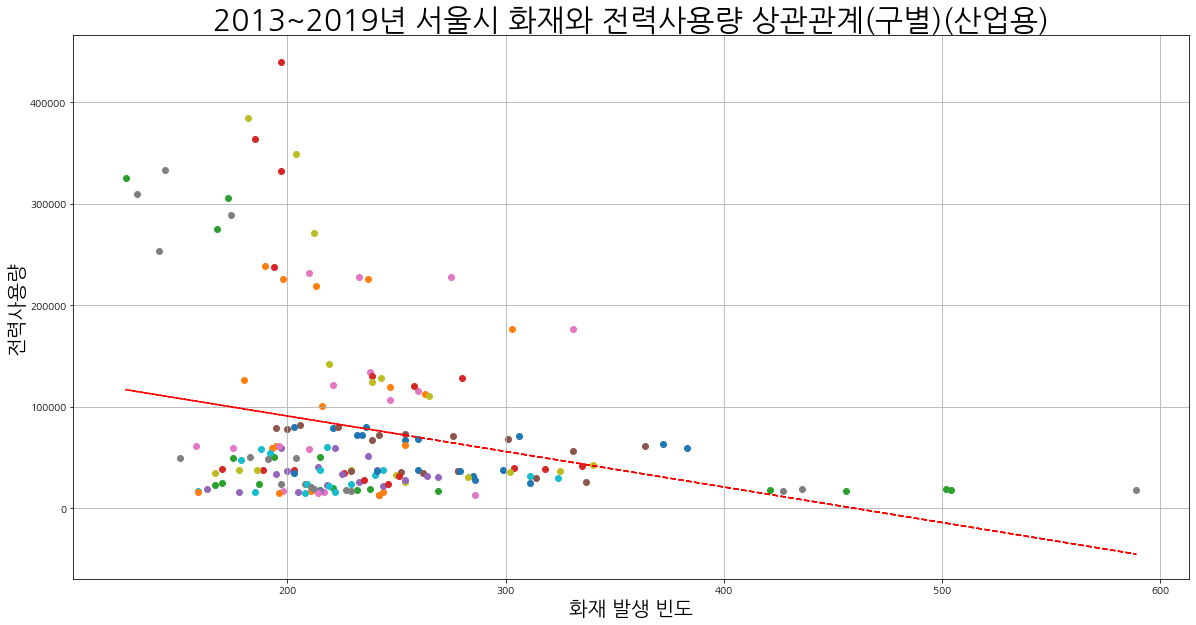

In [46]:
from matplotlib import pyplot
import matplotlib
import pandas as pd
import numpy as np


pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.figure()
pyplot.grid()
pyplot.title('2013~2019년 서울시 화재와 전력사용량 상관관계(구별)(산업용)', fontsize=30)
pyplot.xlabel("화재 발생 빈도", fontsize=20)
pyplot.ylabel("전력사용량", fontsize=20)
pyplot.rcParams["font.family"] = "NanumGothic"

A1=[]
A2=[]

for k in range(3,10):
    year1="201"+str(k)+".txt"
    year2="201"+str(k)+"_E.txt"
    
    file1 = pd.read_csv(year1, delimiter = '\t')
    region=file1["지역"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file1 = file1.set_index(file1.columns[1])

    file2 = pd.read_csv(year2, delimiter = '\t')
    region=file2["자치구"].unique().tolist()
    region.pop(0)
    region.pop(0)
    file2 = file2.set_index(file2.columns[1])
    
    for i in range(0,len(region)):
        region_total=[]
        elec_total=[] 
        file_sample=file1.at[region[i],"발생"]
        file_sample = file_sample.tolist()    
        file_sample = list(map(int, file_sample))
        file_sample.pop(0)
        total_count=0
        
        for j in range(0,12):
            total_count+=file_sample[j]
            
        region_total.append(total_count)
        file_sample=file2.at[region[i],"산업용"]   
        elec_total.append(int(file_sample.replace(",","")))
        pyplot.scatter(region_total,elec_total)    
        A1.append(total_count)
        A2.append(int(file_sample.replace(",","")))

z = np.polyfit(A1, A2, 1)
p = np.poly1d(z)
pyplot.plot(A1,p(A1),"r--")  

# 결론: 한전은 가정용, 서비스용 전력에 대해서 전력사용량이 증가하면 사용자에게 알림이나 메시지로 화재발생 가능성에 대해 경고를 해줘야함

# 여기서부터는 참고사항

# 2019년 서울시 화재발생빈도(서울시 전체)

(array([400., 425., 450., 475., 500., 525., 550., 575., 600., 625.]),
 <a list of 10 Text yticklabel objects>)

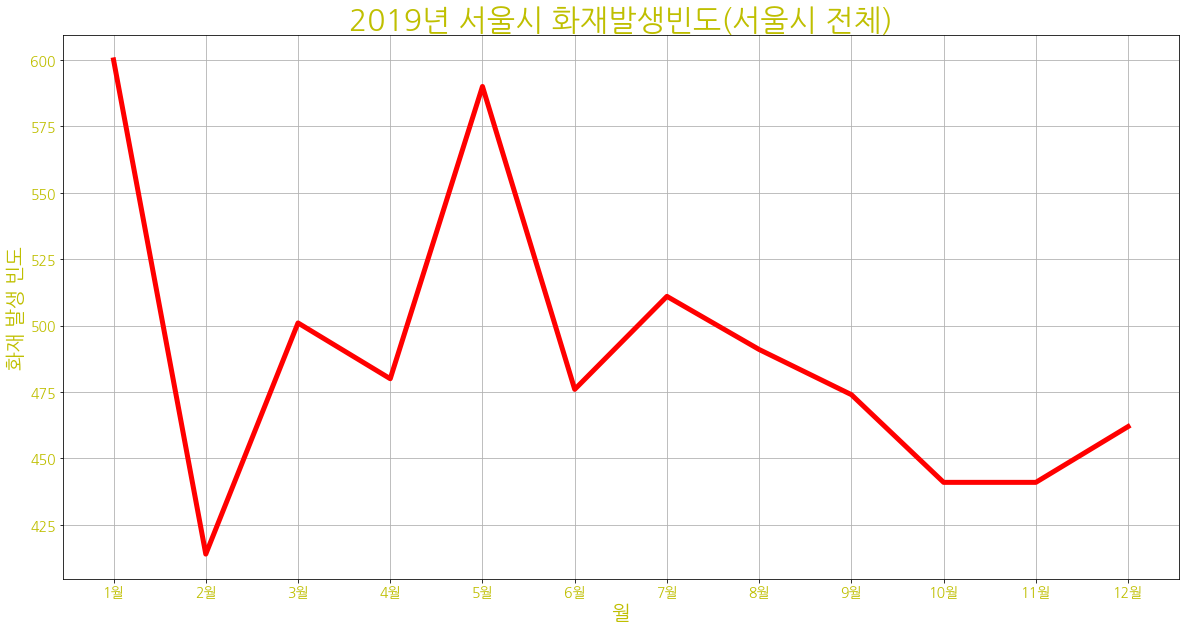

In [60]:
from matplotlib import pyplot
import matplotlib
import pandas as pd

label=["1월","2월","3월","4월","5월","6월",
   "7월","8월","9월","10월","11월","12월"]

file = pd.read_csv('2019.txt', delimiter = '\t')
file = file.set_index(file.columns[1])

pyplot.rcParams["figure.figsize"] = (20,10)
#file_sample=file.loc["강동구",["월별","발생"]]
pyplot.figure()
pyplot.grid()
pyplot.title('2019년 서울시 화재발생빈도(서울시 전체)', fontsize=30, color='y')
pyplot.xlabel("월", fontsize=20, color='y')
pyplot.ylabel("화재 발생 빈도", fontsize=20, color='y')
pyplot.rcParams["font.family"] = "NanumGothic"

 
file_sample=file.at["합계","발생"]
file_sample = file_sample.tolist()
file_sample.pop(0)
file_sample = list(map(int, file_sample))

pyplot.plot(file_sample,linewidth=5,color = 'r')


x=list(range(0,len(label)))

pyplot.xticks(x,label)

pyplot.xticks(fontsize = 14, color = 'y')
pyplot.yticks(fontsize = 14, color = 'y')




# 2013~2019년 서울시 화재발생빈도(총 합계)

(array([3000., 3200., 3400., 3600., 3800., 4000.]),
 <a list of 6 Text yticklabel objects>)

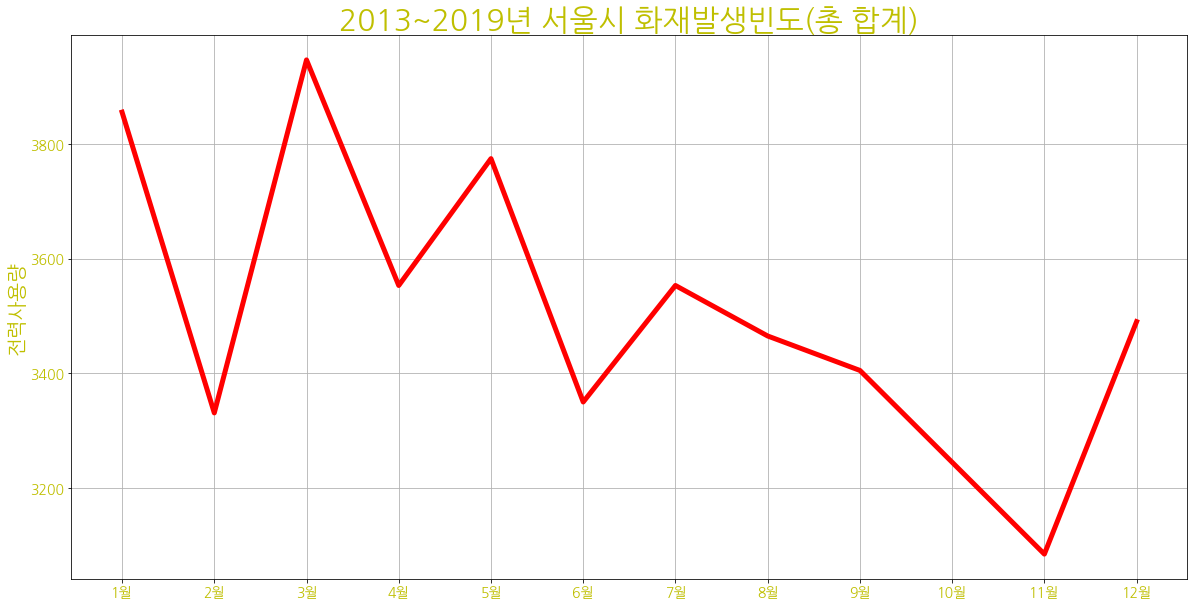

In [88]:
from matplotlib import pyplot
import matplotlib
import pandas as pd

label=["1월","2월","3월","4월","5월","6월",
   "7월","8월","9월","10월","11월","12월"]
total=[0,0,0,0,0,0,0,0,0,0,0,0]

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.rcParams['legend.fontsize'] = 16
pyplot.figure()
pyplot.grid()
pyplot.title('2013~2019년 서울시 화재발생빈도(총 합계)', fontsize=30, color='y')
pyplot.ylabel("화재 발생 빈도", fontsize=20, color='y')
pyplot.rcParams["font.family"] = "NanumGothic"
for i in range(3,10):
    year="201"+str(i)+".txt"
    
    file = pd.read_csv(year, delimiter = '\t')
    file = file.set_index(file.columns[1])

    file_sample=file.at["합계","발생"]
    file_sample = file_sample.tolist()
    file_sample.pop(0)
    file_sample = list(map(int, file_sample))
    for j in range(0,12):
        total[j]=total[j]+file_sample[j]

pyplot.plot(total,linewidth=5,color = 'r')
    
x=list(range(0,len(label)))

pyplot.xticks(x,label)

pyplot.xticks(fontsize = 14, color = 'y')
pyplot.yticks(fontsize = 14, color = 'y')

# 2013~2019년 서울시 화재발생빈도(구별)

(array([350., 400., 450., 500., 550., 600., 650., 700.]),
 <a list of 8 Text yticklabel objects>)

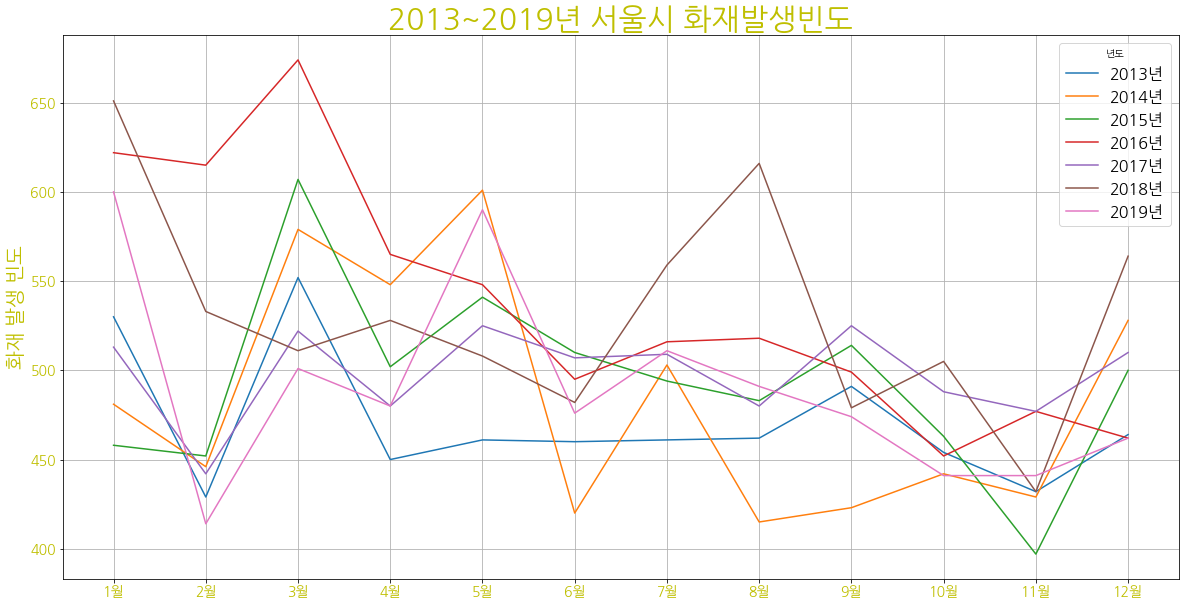

In [46]:
from matplotlib import pyplot
import matplotlib
import pandas as pd

label=["1월","2월","3월","4월","5월","6월",
   "7월","8월","9월","10월","11월","12월"]

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.rcParams['legend.fontsize'] = 16
pyplot.figure()
pyplot.grid()
pyplot.title('2013~2019년 서울시 화재발생빈도', fontsize=30, color='y')
pyplot.ylabel("화재 발생 빈도", fontsize=20, color='y')
pyplot.rcParams["font.family"] = "NanumGothic"
for i in range(3,10):
    year="201"+str(i)+".txt"
    
    file = pd.read_csv(year, delimiter = '\t')
    file = file.set_index(file.columns[1])

    file_sample=file.at["합계","발생"]
    file_sample = file_sample.tolist()
    file_sample.pop(0)
    file_sample = list(map(int, file_sample))

    pyplot.plot(file_sample,label=year[:4]+"년")
    
    pyplot.legend(title="년도", loc=1)    
x=list(range(0,len(label)))

pyplot.xticks(x,label)

pyplot.xticks(fontsize = 14, color = 'y')
pyplot.yticks(fontsize = 14, color = 'y')